# Matplotlib

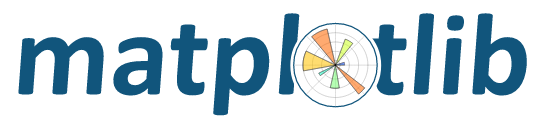

> 수정 2022.11

Matplot lib 세부 튜토리얼

> - [Matplotlib Tutorial - 파이썬으로 데이터 시각화하기, Wikidoc](https://wikidocs.net/book/5011)
> - https://wikidocs.net/92089
> - 효과적으로 matplotlib사용하기 [링크](http://pbpython.com/effective-matplotlib.html)
> - Matplotlib를 사용한 시각화 예제들을 보고 싶다면 Matplotlib [갤러리](http://matplotlib.org/gallery.html)를 방문하세요.
> - 데이터 사이언스 스쿨의 Matplotlib [소개](https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/)

## 소개
Matplotlib는 파이썬에서 자료를 차트(chart)나 플롯(plot)으로 시각화(visulaization)하는 패키지입니다.

주피터(Jupyter) 노트북을 사용하는 경우에는 다음처럼 매직(magic) 명령으로 노트북 내부에 그림을 표시하도록 지정해야 합니다.
```
%matplotlib inline
```

Plot 의 구조

Matplotlib의 그림은 Figure 객체, Axes 객체, Axis 객체 등으로 구성되어 있습니다. Figure 객체는 한 개 이상의 Axes 객체를 포함하고 Axes 객체는 다시 두 개 이상의 Axis 객체를 포함합니다. 말로 하면 이해하기 힘드니 그림으로 보겠습니다.

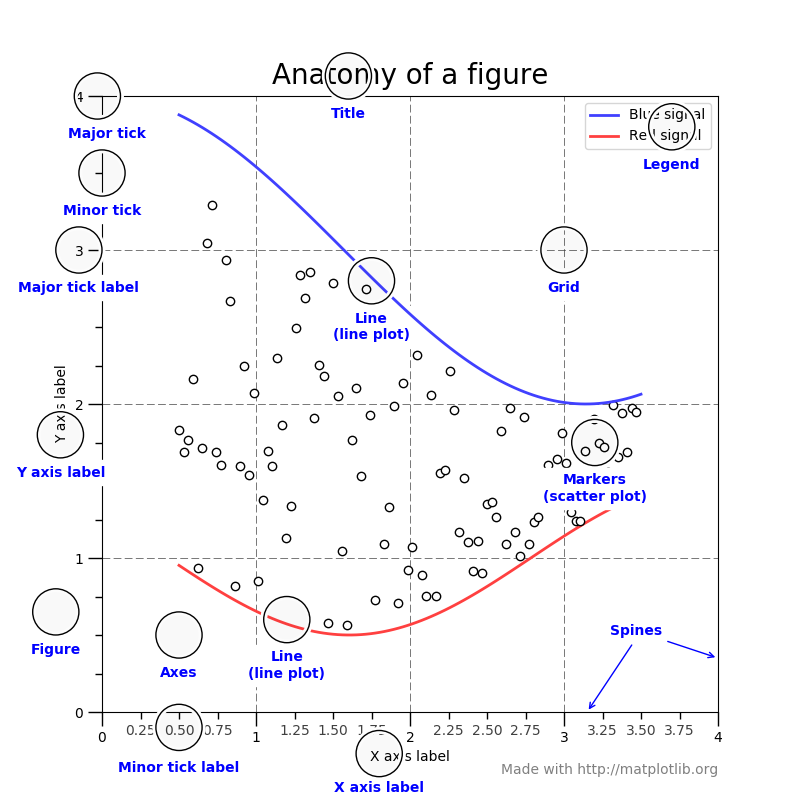

## 설치

```sh
pip install -U pip
pip install -U matplotlib
```

conda 설치

```sh
conda install -y matplotlib
```


In [ ]:
! pip install matplotlib seaborn

# 주요 설치 정보

    Mac이나 Windows에서 확인 

## 시각화 모듈 : matplotlib, seaborn

In [ ]:

import matplotlib

print ('버전: ', matplotlib.__version__)
print ('설치위치: ', matplotlib.__file__)
print ('설정: ', matplotlib.get_configdir())
print ('캐시: ', matplotlib.get_cachedir())

In [ ]:
import seaborn

print ('버전: ', seaborn.__version__)
print ('설치위치: ',seaborn.__file__)

### 그리드와 그래프 사이즈 지정

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

### 한글 폰트 전체 반영 

In [ ]:
import matplotlib.font_manager as fm

# 전역 폰트 설정 사용
# font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!
# plt.rc('font', family=fontname)
plt.rcParams["font.family"] = fontname
plt.rcParams["font.size"] = 12

# matplotlib 설정
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

plt.title('한글 타이틀...')

# 1. 그래프 기본  알아보기

### 시본에 있는 팁에 대한 데이터를 로드하기

       시본 내의 데이터를 로딩하면 pandas의 데이터프레임으로 처리함 

In [ ]:
import seaborn as sns

###  제공하는 데이터를 로딩 : load_dataset 함수 이용

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.head()

# 1. 그래프 구조 알기 

### 그래프가 들어갈 장소를 만들기

In [ ]:
fig = plt.figure()

### 그래프를 그릴 세부 위치 만들기

In [ ]:
axes1 = fig.add_subplot(2,2,1) # nrows, ncols, index

### 히스토그램 그리기

In [ ]:

axes1.hist(tips['total_bill'], bins=10)


### 그래프 확인하기 

In [ ]:
fig

### 스캐터 그래프 그리기

In [ ]:
axes1 = fig.add_subplot(2,2,2)
axes1.scatter(tips['total_bill'], tips['tip'])

In [ ]:
fig

### 선 그래프 그리기 

In [ ]:
axes1 = fig.add_subplot(2,2,3)
axes1.plot(tips['total_bill'], tips['tip'])

In [ ]:
fig

### 상자 그래프 그리기

In [ ]:
axes1 = fig.add_subplot(2,2,4)
axes1.boxplot([tips[ tips['sex'] == 'Female']['tip'],
              tips[ tips['sex'] == 'Male']['tip']])

In [ ]:
fig

### 그래프를 동시에 나누기 및 간격 조정하기

In [ ]:
import numpy as np

x = np.arange(1,10)
y1 = x*5
y2 = x*1
y3 = x*0.3
y4 = x*0.2

plt.figure(figsize=(20,5))
plt.subplot(2,2,1)
plt.plot(x,y1)
plt.subplot(2,2,2)
plt.plot(x,y2)
plt.subplot(2,2,3)
plt.plot(x,y3)
plt.subplot(2,2,4)
plt.plot(x,y4)

## 간격처리
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

plt.show()


# 2. fig 객체를 이용해서 출력하기

     doitpandas  참조

## 두번째 데이터를 로딩하기

In [ ]:
import seaborn as sns 
anscombe = sns.load_dataset("anscombe") 

In [ ]:
type(anscombe)

In [ ]:
anscombe.head()

### 칼럼 정보 확인

In [ ]:
anscombe.columns

### 논리 검색을 위해 특정 행정보만 추출 

In [ ]:
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II'] 
dataset_3 = anscombe[anscombe['dataset'] == 'III'] 
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

### 하나의 figure에 4 개의 그래프를 표시

In [ ]:
fig = plt.figure()
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

### 실제 그래프를 그리기 fig 객체로 출력 가능

      선그래프이지만 marker를 지정해서 점으로 출력함

In [ ]:
axes1.plot(dataset_1['x'], dataset_1['y'], 'o') 
axes2.plot(dataset_2['x'], dataset_2['y'], 'o') 
axes3.plot(dataset_3['x'], dataset_3['y'], 'o') 
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

### 각각의 그래프에 제목을 출력

In [ ]:
axes1.set_title("dataset_1") 
axes2.set_title("dataset_2")
axes3.set_title("dataset_3") 
axes4.set_title("dataset_4")

fig

### 전체 제목을 표시

In [ ]:
fig.suptitle("Anscombe Data")

fig

### 그래프 내의 간격을 자동으로 조정

In [ ]:
fig.tight_layout()

fig

# 3.  점 그래프에서 크기와 색상을 조정하기

      doitpandas  참조
    

## 함수를 지정해서 내부 칼럼 추가

In [ ]:
def recode_sex(sex):
    if sex == 'Female':
        return 0 
    else:
        return 1

### apply 함수를 이용해서 행의 값들을 변경하고 새로운 열에 추가하기

In [ ]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

In [ ]:
tips.head()

In [ ]:
# lambda 로 구현해 보자.




In [ ]:
#tips['sex'].apply( lambda sex:   ... )



## 그래프 그리기

In [ ]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],    
    alpha=0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 


### 점 그래프에 대한 함수 기능 조회

In [ ]:
help(axes1.scatter)

### 마커사이즈를 s에 추가

In [ ]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],    
    s=tips['size'] * 20,    
    alpha=0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 

### 칼라를 c에 추가

In [ ]:
scatter_plot = plt.figure() 
axes1 = scatter_plot.add_subplot(1, 1, 1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'],    
    s=tips['size'] * 30,    
    c=tips['sex_color'],
    alpha=0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip') 

# 4. 그래프 꾸미기

### 임의의 배열을 만들어서 이 값들이 누적값 처리  

In [ ]:
import numpy as np
data = np.random.randint(-100, 100, 50).cumsum()
data

### 레이블과 제목을 처리하기 , 한글 폰트 처리 추가

In [ ]:
font_path   # 앞서 선언한 한글 폰트 경로

In [ ]:
fontprop = fm.FontProperties(fname=font_path)

plt.ylabel('가격', fontproperties=fontprop)
plt.title('가격변동 추이', fontproperties=fontprop)
plt.plot(range(50), data, 'r')
plt.show()

### 다른 한글을 직접 제목에 넣어 처리하기

In [ ]:

plt.title('다른 한글 제목', fontproperties=fontprop)
plt.plot(data)
plt.show()

### 범례 처리하기 

In [ ]:
x = np.arange(1,10,0.1)
y = x*0.2
y2 = np.sin(x)

plt.plot(x,y,'b', label='first')
plt.plot(x,y2,'r', label='second')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()


In [ ]:
x = np.arange(1,10,0.1)
y = x*0.2
y2 = np.sin(x)

plt.plot(x,y,'b', label='한글라벨1')
plt.plot(x,y2,'r', label='글자라벨2')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()


### 주석달기

In [ ]:
x = np.arange(1,10)
y = x*5

plt.plot(x,y)
plt.annotate('annotate',xy=(2,10),xytext=(5,20),arrowprops={'color':'green'})
plt.show()

### 텍스트 입력하기

In [ ]:

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# 히스토그램 만들기
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

### 원그래프 그리기

In [ ]:
# matplotlib 컬러맵 생성
import matplotlib as mpl
import numpy as np

def make_colors(n, colormap=plt.cm.Spectral):
    return colormap(np.linspace(0.1, 1.0, n))

def make_explode(n):
    explodes = np.zeros(n)
    explodes[0] = 0.15
    return explodes

### 박스 그래프 

In [ ]:
help(plt.boxplot)

In [ ]:
plt.boxplot(x)

plt.show()

### x 축에 대한 설명을 바꾸려면 박스그래프에 맞는 숫자와 매핑해서 문자열을 넣기

In [ ]:
plt.boxplot(x)

plt.xticks([1], ['x'])
plt.show()